In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the `scipy.interpolate` module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  `UnivariateSpline` from `scipy.interpolate` to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```

The storm wind speed occurring every 50 years is estimated to be: 32.98 m/s


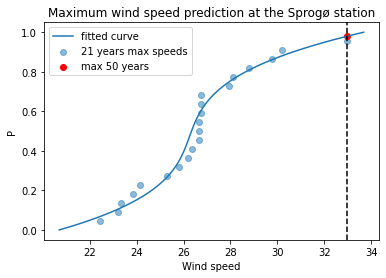

In [32]:
# Import
from scipy.interpolate import UnivariateSpline

# Load the dataset
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0] # Finding the number of years (21)

# Calculate cumulative probability
# np.arange(1, years_nb + 1) years in cumulative form till 21 years
# Cumulative probability: p_i = i/(N+1), with N=21
cprob = np.arange(1, years_nb + 1) / (years_nb + 1)

# Sort the maximum speeds
sorted_speeds = np.sort(max_speeds)

# Use UnivariateSpline to define the quantile function
quantile_func = UnivariateSpline(cprob, sorted_speeds)

# Define the cumulative probability for the 50-year event
fifty_prob = 1. - 0.02

# Estimate the storm wind speed occurring every 50 years
fifty_wind = quantile_func(fifty_prob)

print(f"The storm wind speed occurring every 50 years is estimated to be: {fifty_wind:.2f} m/s")

# plot
# generate data
prob_values = np.linspace(0, 1, 100)
fitted_max_speeds = quantile_func(prob_values)

plt.scatter(sorted_max_speeds, cprob, label="21 years max speeds", alpha=0.5)
plt.scatter(fifty_wind, fifty_prob, color='red', label='max 50 years')
plt.plot(fitted_max_speeds, prob_values, label="fitted curve")
plt.axvline(x=fifty_wind, color='black', linestyle='dashed')
plt.title('Maximum wind speed prediction at the Sprogø station')
plt.xlabel('Wind speed')
plt.ylabel('P')
plt.legend(loc='best')
plt.show()

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

In [20]:
# Import curvefit
from scipy.optimize import curve_fit

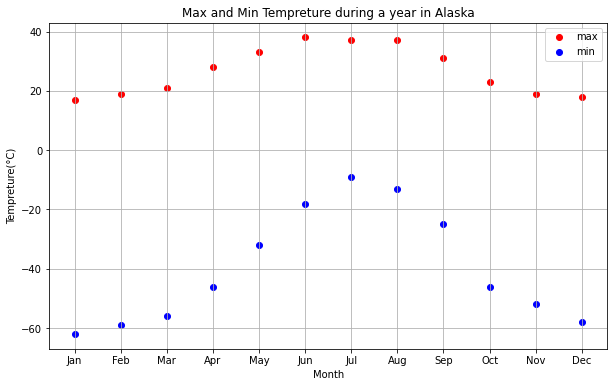

In [21]:
# the Data
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
max_temp = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
min_temp = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

# Plot these temperature extremes
plt.figure(figsize=(10, 6))
plt.scatter(months, max_temp, label='max', color='red')
plt.scatter(months, min_temp, label='min', color='blue')
plt.title('Max and Min Tempreture during a year in Alaska', size=12)
plt.xlabel('Month')
plt.ylabel('Tempreture(°C)')
plt.legend()
plt.grid()
plt.show()

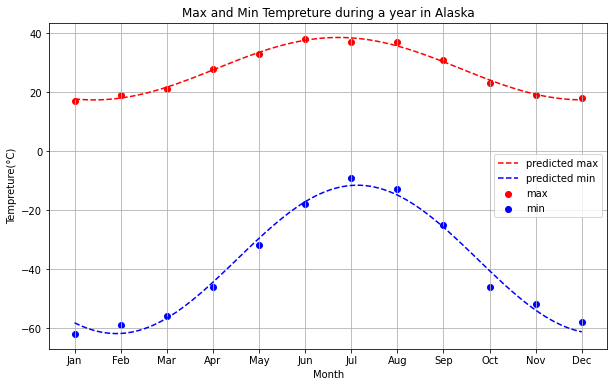

In [121]:
# Define a function that can describe min and max temperatures.
def sin_model(t, A, B, C, D):
    '''
    a periodic model like sin(t) can be a good choice.
    t : time
    '''
    return A*np.sin(B*t+C)+D

# Fit this function to the data with scipy.optimize.curve_fit()
x_data = np.arange(12) # months
popt_max, pcov_max = curve_fit(sin_model, xdata=x_data, ydata=max_temp, p0=[20, np.pi/12, 0, 20])
popt_min, pcov_min = curve_fit(sin_model, xdata=x_data, ydata=min_temp, p0=[50, np.pi/12, 0, -60])

# Plot the result. Is the fit reasonable? If not, why?
plt.figure(figsize=(10, 6))

x_dom = np.arange(0, 11.1, 0.1)
plt.plot(x_dom, sin_model(x_dom, *popt_max), label='predicted max', color='red', linestyle='dashed')
plt.plot(x_dom, sin_model(x_dom, *popt_min), label='predicted min', color='blue', linestyle='dashed')

plt.scatter(months, max_temp, label='max', color='red')
plt.scatter(months, min_temp, label='min', color='blue')

plt.title('Max and Min Tempreture during a year in Alaska', size=12)
plt.xlabel('Month')
plt.ylabel('Tempreture(°C)')
plt.legend()
plt.grid()
plt.show()

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


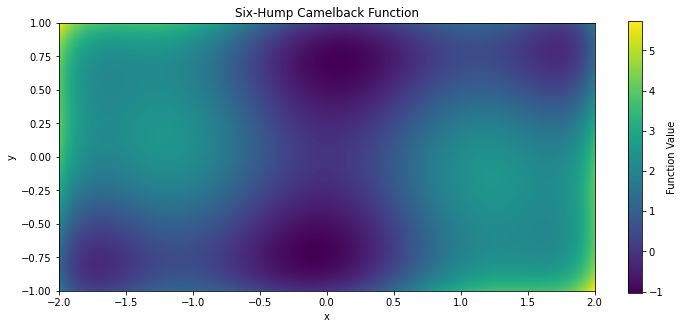

In [13]:
# Define the function
def func(x):
    return (4 - 2.1 * x[0]**2 + x[0]**4 / 3) * x[0]**2 + x[0] * x[1] + (4 * x[1]**2 - 4) * x[1]**2

# Variables can be restricted to  −2 < 𝑥 < 2 and  −1 < 𝑦 < 1
x0 = np.linspace(start=-2, stop=2, num=1000)
x1 = np.linspace(start=-1, stop=1, num=1000)

# Use numpy.meshgrid() and pylab.imshow() to find visually the regions
x0_plot, x1_plot = np.meshgrid(x0, x1)

# Plot
plt.figure(figsize=(12, 5))
plt.imshow(func([x0_plot, x1_plot]), extent = [x0.min(), x0.max(), x1.min(), x1.max()])
plt.colorbar(label = 'Function Value')
plt.title('Six-Hump Camelback Function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

It looks like there are 4 local minimum in this region.
2 of them are the global minimum since the function is even in both x and y:

f(-x,-y) = f(x,y)

Init guess: [0, -1]
      fun: -1.0316284534898152
 hess_inv: array([[ 0.1283473 , -0.00788036],
       [-0.00788036,  0.06138296]])
      jac: array([1.93715096e-07, 1.53481960e-06])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([ 0.08984202, -0.71265632]) 

Init guess: [0, 1]
      fun: -1.031628453489791
 hess_inv: array([[ 0.12834732, -0.00788045],
       [-0.00788045,  0.06138297]])
      jac: array([-2.08616257e-07, -1.53481960e-06])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([-0.08984203,  0.7126563 ]) 

There are two global minimum:
 [ 0.08984202 -0.71265632] 
 [-0.08984203  0.7126563 ]

The function value is:
 -1.0316284534898152 
 -1.031628453489791


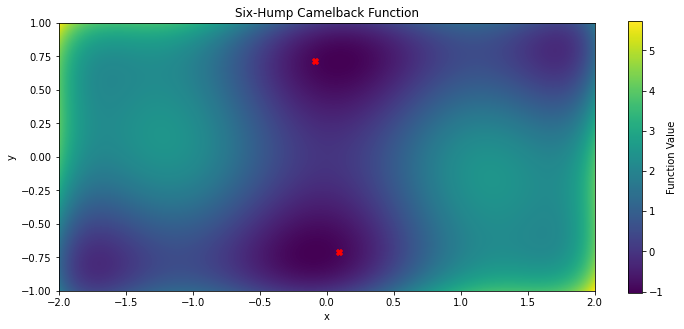

In [22]:
# Use scipy.optimize.minimize(), optionally trying out several of its methods.
from scipy.optimize import minimize

guesses = [[0, -1], [0, 1]]

all_solutions = []

for guess in guesses:
    solution = minimize(func, x0=guess)
    all_solutions.append(solution)
    print('Init guess:', guess)
    print(solution, '\n')
    
print('There are two global minimum:\n', all_solutions[0]['x'], '\n', all_solutions[1]['x'])
print()
print('The function value is:\n', all_solutions[0]['fun'], '\n', all_solutions[1]['fun'])

# plot
plt.figure(figsize=(12, 5))
plt.imshow(func([x0_plot, x1_plot]), extent = [x0.min(), x0.max(), x1.min(), x1.max()])
plt.colorbar(label = 'Function Value')
plt.scatter(all_solutions[0]['x'][0], all_solutions[0]['x'][1], marker='X', color='red')
plt.scatter(all_solutions[1]['x'][0], all_solutions[1]['x'][1], marker='X', color='red')
plt.title('Six-Hump Camelback Function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

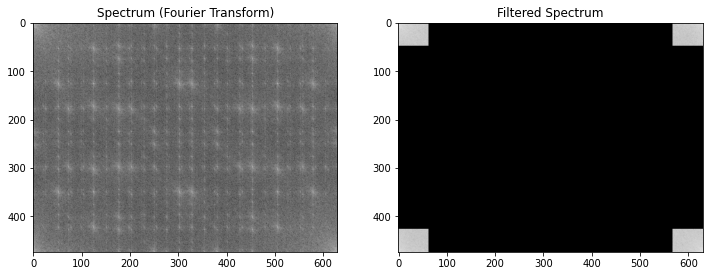

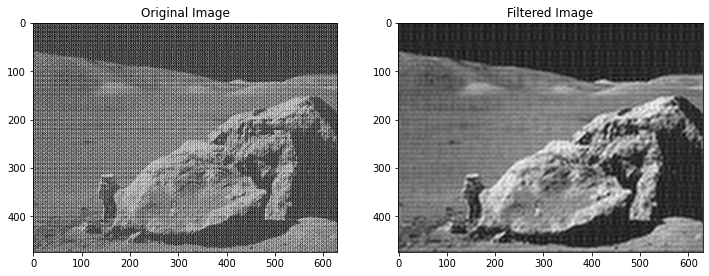

In [59]:
from scipy.fftpack import fft2, ifft2

# Load the image
moonlanding_img = plt.imread('moonlanding.png')

# Perform 2D FFT on the image
ml_fft = fft2(moonlanding_img)

# Plot the spectrum (Fourier transform)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.log(np.abs(ml_fft) + 1e-10), cmap='gray')  # Add a small constant to avoid log(0)
plt.title('Spectrum (Fourier Transform)')

# Identify and set high-frequency components to zero
keep_fraction = 0.1
ml_fft_filtered = ml_fft.copy()
rows, cols = ml_fft.shape
# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
ml_fft_filtered[int(rows * keep_fraction) : int(rows * (1 - keep_fraction))] = 0
# Similarly with the columns:
ml_fft_filtered[:, int(cols * keep_fraction) : int(cols * (1 - keep_fraction))] = 0

# Plot the filtered spectrum
plt.subplot(122)
plt.imshow(np.log(np.abs(ml_fft_filtered) + 1e-10), cmap='gray')  # Add a small constant to avoid log(0)
plt.title('Filtered Spectrum')

# Apply inverse Fourier transform to get the cleaned image
img_filtered = np.abs(ifft2(ml_fft_filtered))

# Plot the original and cleaned images side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(moonlanding_img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(img_filtered, cmap='gray')
axs[1].set_title('Filtered Image')

plt.show()